# problem : 


 a big number of illegal migration and the numbers of survived or dead or missing of peaple because of migration is unknouwn 


# solution : 

predect the number of missing and dead peaple in certain location

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler


data= pd.read_csv('MissingMigrants-Global-2019-03-29T18-36-07.csv')


# 1- data analysis

In [2]:
data.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality
0,51591,Mediterranean,"March 28, 2019",2019,Mar,NaN,2.0,2,36.0,NaN,2.0,NaN,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5
1,51588,Mediterranean,"March 26, 2019",2019,Mar,4.0,NaN,4,11.0,3.0,NaN,1.0,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5
2,51589,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3
3,51590,Mediterranean,"March 26, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,NaN,NaN,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1
4,51587,Central America,"March 25, 2019",2019,Mar,1.0,NaN,1,NaN,NaN,1.0,NaN,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5333 entries, 0 to 5332
Data columns (total 20 columns):
Web ID                                 5333 non-null int64
Region of Incident                     5333 non-null object
Reported Date                          5333 non-null object
Reported Year                          5333 non-null int64
Reported Month                         5333 non-null object
Number Dead                            5142 non-null float64
Minimum Estimated Number of Missing    503 non-null float64
Total Dead and Missing                 5333 non-null int64
Number of Survivors                    749 non-null float64
Number of Females                      897 non-null float64
Number of Males                        2813 non-null float64
Number of Children                     644 non-null float64
Cause of Death                         5333 non-null object
Location Description                   5323 non-null object
Information Source                     5331 non-null o

In [4]:
data.describe()

,Web ID,Reported Year,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Source Quality
count,5333.000000,5333.000000,5142.000000,503.000000,5333.000000,749.000000,897.000000,2813.000000,644.000000,5333.000000
mean,43247.885805,2016.656104,3.287631,29.119284,5.916370,63.607477,2.012263,1.890864,2.476708,2.895556
std,5186.837212,1.237033,13.593407,67.913216,28.051811,146.520155,2.990100,5.510674,10.216220,1.423257
min,30158.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,40876.000000,2016.000000,1.000000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000,2.000000
50%,43504.000000,2017.000000,1.000000,7.000000,1.000000,15.000000,1.000000,1.000000,1.000000,2.000000
75%,45747.000000,2018.000000,2.000000,25.000000,3.000000,61.000000,2.000000,1.000000,2.000000,4.000000
max,51592.000000,2019.000000,750.000000,750.000000,1022.000000,1950.000000,30.000000,135.000000,250.000000,5.000000


In [5]:
data.isnull().sum()

Web ID                                    0
Region of Incident                        0
Reported Date                             0
Reported Year                             0
Reported Month                            0
Number Dead                             191
Minimum Estimated Number of Missing    4830
Total Dead and Missing                    0
Number of Survivors                    4584
Number of Females                      4436
Number of Males                        2520
Number of Children                     4689
Cause of Death                            0
Location Description                     10
Information Source                        2
Location Coordinates                      1
Migration Route                        2673
URL                                    2141
UNSD Geographical Grouping               11
Source Quality                            0
dtype: int64

# 2-data processor

In [6]:
data['Number Dead']=data['Number Dead'].fillna(data['Number Dead'].mean())
data['Location Description']=data['Location Description'].fillna(data['Location Description'].mode()[0])
data['Information Source']=data['Information Source'].fillna(data['Information Source'].mode()[0])
data['Location Coordinates']=data['Location Coordinates'].fillna(data['Location Coordinates'].mode()[0])
data['UNSD Geographical Grouping']=data['UNSD Geographical Grouping'].fillna(data['UNSD Geographical Grouping'].mode()[0])

In [7]:
data['Minimum Estimated Number of Missing']=data['Total Dead and Missing']-data["Number Dead"]
data['Number of Survivors'].fillna(0, inplace=True)
data['Number of Females'].fillna(0, inplace=True)
data['Number of Males'].fillna(int(data['Number of Males'].mean()), inplace=True)
data['Number of Children'].fillna(0, inplace=True)

In [8]:
data['Minimum Estimated Number of Missing']=data['Minimum Estimated Number of Missing'].astype(int)
data['Total Dead and Missing']=data['Total Dead and Missing'].astype(int)
data['Number Dead']=data['Number Dead'].astype(int)
data['Number of Survivors']=data['Number of Survivors'].astype(int)
data['Number of Females']=data['Number of Females'].astype(int)
data['Number of Males']=data['Number of Males'].astype(int)
data['Number of Children']=data['Number of Children'].astype(int)

In [9]:
data.isnull().sum()

Web ID                                    0
Region of Incident                        0
Reported Date                             0
Reported Year                             0
Reported Month                            0
Number Dead                               0
Minimum Estimated Number of Missing       0
Total Dead and Missing                    0
Number of Survivors                       0
Number of Females                         0
Number of Males                           0
Number of Children                        0
Cause of Death                            0
Location Description                      0
Information Source                        0
Location Coordinates                      0
Migration Route                        2673
URL                                    2141
UNSD Geographical Grouping                0
Source Quality                            0
dtype: int64

In [10]:
data['Latitude'], data['Longtitude'] = data['Location Coordinates'].str.split(', ').str

In [11]:
data['Latitude']=data['Latitude'].astype(float)
data['Longtitude']=data['Longtitude'].astype(float)
data.head()

,Web ID,Region of Incident,Reported Date,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,...,Cause of Death,Location Description,Information Source,Location Coordinates,Migration Route,URL,UNSD Geographical Grouping,Source Quality,Latitude,Longtitude
0,51591,Mediterranean,"March 28, 2019",2019,Mar,3,-1,2,36,0,...,Presumed drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,"38.362368696592, 26.172509473654",Eastern Mediterranean,NaN,Uncategorized,5,38.362369,26.172509
1,51588,Mediterranean,"March 26, 2019",2019,Mar,4,0,4,11,3,...,Presumed drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,"39.441975591614, 26.378816195919",Eastern Mediterranean,http://bit.ly/2YmiPAN,Uncategorized,5,39.441976,26.378816
2,51589,Mediterranean,"March 26, 2019",2019,Mar,1,0,1,0,0,...,Presumed drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta","35.871901875921, -5.343037665842",Western Mediterranean,"http://bit.ly/2uyj7qO, http://bit.ly/2uwj5zC",Uncategorized,3,35.871902,-5.343038
3,51590,Mediterranean,"March 26, 2019",2019,Mar,1,0,1,0,0,...,Presumed drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,"35.635115912988, -5.275650103548",Western Mediterranean,http://bit.ly/2uwj5zC,Uncategorized,1,35.635116,-5.275650
4,51587,Central America,"March 25, 2019",2019,Mar,1,0,1,0,0,...,Fall from train,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste","19.334475177429, -98.069823987538",NaN,"http://bit.ly/2uvDIvH, http://bit.ly/2TXAFLS",Central America,3,19.334475,-98.069824


In [12]:
toDrop =["Web ID","Reported Date","URL","Location Coordinates"]
data.drop(toDrop, axis=1, inplace=True)


In [13]:
data.loc[data['Cause of Death'].str.contains('Sickness|sickness'), 'Cause of Death'] = 'Health Condition'
data.loc[data['Cause of Death'].str.contains('diabetic|heart attack|meningitis|virus|cancer|bleeding|insuline|inhalation'), 'Cause of Death'] = 'Health Condition'
data.loc[data['Cause of Death'].str.contains('Organ|Coronary|Envenomation|Post-partum|Respiratory|Hypoglycemia'), 'Cause of Death'] = 'Health Condition'
data.loc[data['Cause of Death'].str.contains('harsh weather|Harsh weather'), 'Cause of Death'] = 'Harsh conditions'
data.loc[data['Cause of Death'].str.contains('Harsh conditions|harsh conditions'), 'Cause of Death'] = 'Harsh conditions'
data.loc[data['Cause of Death'].str.contains('Exhaustion|Heat stroke'), 'Cause of Death'] = 'Harsh conditions'
data.loc[data['Cause of Death'].str.contains('Unknown|unknown'), 'Cause of Death'] = 'Unknown'
data.loc[data['Cause of Death'].str.contains('Starvation|starvation'), 'Cause of Death'] = 'Starvation'
data.loc[data['Cause of Death'].str.contains('dehydration|Dehydration'), 'Cause of Death'] = 'Dehydration'
data.loc[data['Cause of Death'].str.contains('Drowning|drowning|Pulmonary|respiratory|lung|bronchial|pneumonia|Pneumonia'), 'Cause of Death'] = 'Drowning'
data.loc[data['Cause of Death'].str.contains('hyperthermia|Hyperthermia'), 'Cause of Death'] = 'Hyperthermia'
data.loc[data['Cause of Death'].str.contains('hypothermia|Hypothermia'), 'Cause of Death'] = 'Hypothermia'
data.loc[data['Cause of Death'].str.contains('asphyxiation|suffocation'), 'Cause of Death'] = 'Asphyxiation'
data.loc[data['Cause of Death'].str.contains('train|bus|vehicle|truck|boat|car|road|van|plane'), 'Cause of Death'] = 'Vehicle Accident'
data.loc[data['Cause of Death'].str.contains('Train|Bus|Vehicle|Truck|Boat|Car|Road|Van|Plane'), 'Cause of Death'] = 'Vehicle Accident'
data.loc[data['Cause of Death'].str.contains('murder|stab|shot|violent|blunt force|violence|beat-up|fight|murdered|death'), 'Cause of Death'] = 'Murder'
data.loc[data['Cause of Death'].str.contains('Murder|Stab|Shot|Violent|Blunt force|Violence|Beat-up|Fight|Murdered|Death'), 'Cause of Death'] = 'Murder'
data.loc[data['Cause of Death'].str.contains('Hanging|Apache|mortar|landmine|Rape|Gassed'), 'Cause of Death'] = 'Murder'
data.loc[data['Cause of Death'].str.contains('crushed to death|crush|Crush|Rockslide'), 'Cause of Death'] = 'Crushed'
data.loc[data['Cause of Death'].str.contains('burn|burns|burned|fire'), 'Cause of Death'] = 'Burned'
data.loc[data['Cause of Death'].str.contains('Burn|Burns|Burned|Fire'), 'Cause of Death'] = 'Burned'
data.loc[data['Cause of Death'].str.contains('electrocution|Electrocution'), 'Cause of Death'] = 'Electrocution' 
data.loc[data['Cause of Death'].str.contains('Fall|fall'), 'Cause of Death'] = 'Fallen' 
data.loc[data['Cause of Death'].str.contains('crocodile|hippopotamus|hippoptamus'), 'Cause of Death'] = 'Killed by animals'
data.loc[data['Cause of Death'].str.contains('exposure|Exposure'), 'Cause of Death'] = 'Exposure'

In [14]:
data.head()

,Region of Incident,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Location Description,Information Source,Migration Route,UNSD Geographical Grouping,Source Quality,Latitude,Longtitude
0,Mediterranean,2019,Mar,3,-1,2,36,0,2,0,Drowning,"Off the coast of Chios, Greece",Hellenic Coast Guard via IOM Greece,Eastern Mediterranean,Uncategorized,5,38.362369,26.172509
1,Mediterranean,2019,Mar,4,0,4,11,3,1,1,Drowning,"Off the coast of Ayvacık district, Çanakkale p...",Turkish Coast Guard via IOM Turkey,Eastern Mediterranean,Uncategorized,5,39.441976,26.378816
2,Mediterranean,2019,Mar,1,0,1,0,0,1,0,Drowning,"Body recovered on Playa del Tarajal, Ceuta, Sp...","Ceuta al día, El Pueblo de Ceuta",Western Mediterranean,Uncategorized,3,35.871902,-5.343038
3,Mediterranean,2019,Mar,1,0,1,0,0,1,0,Drowning,"Body recovered on beach near Tetouan, Morocco ...",El Pueblo de Ceuta,Western Mediterranean,Uncategorized,1,35.635116,-5.275650
4,Central America,2019,Mar,1,0,1,0,0,1,0,Vehicle Accident,"Train tracks in Teacalco, Tlaxcala, Mexico","Megalópolis, Línea de contraste",NaN,Central America,3,19.334475,-98.069824


# 3-data visualization

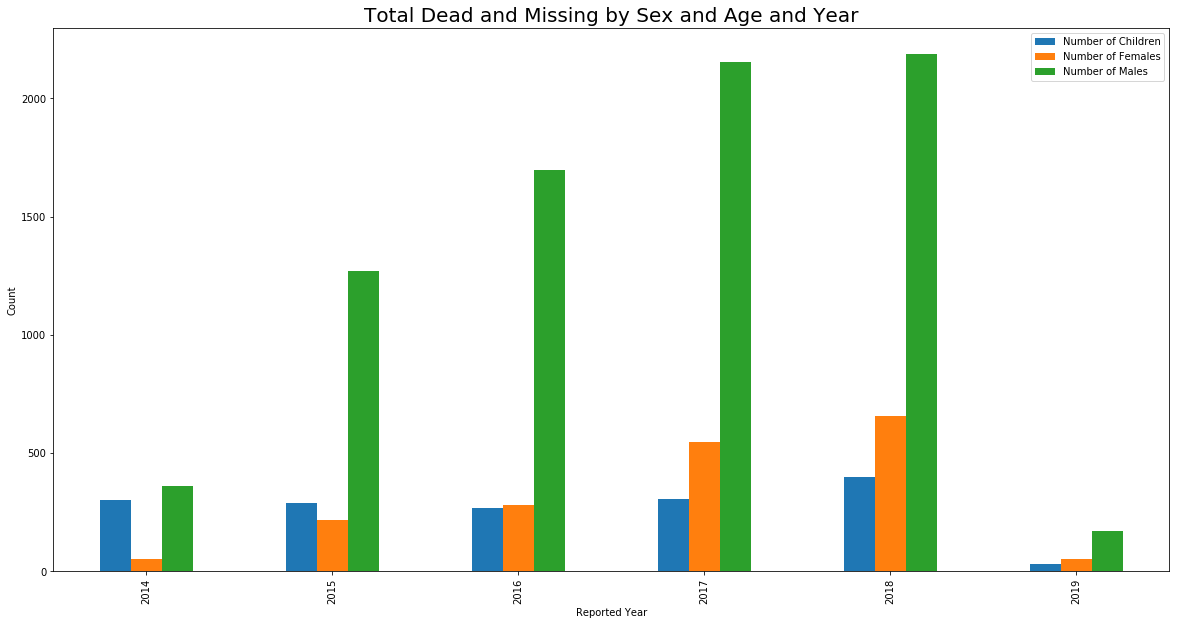

In [15]:
data.pivot_table(['Number of Males','Number of Females','Number of Children'], 
                 index='Reported Year',
                 aggfunc={'Number of Males': np.sum,'Number of Females': np.sum,'Number of Children': np.sum}).plot(figsize=(20, 10), kind='bar')
plt.ylabel('Count')
plt.title('Total Dead and Missing by Sex and Age and Year', fontsize=20)
plt.show()

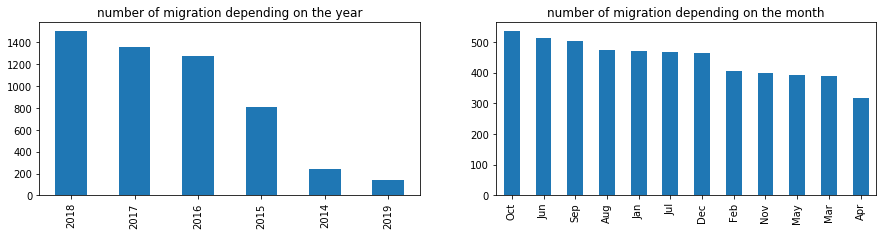

In [17]:
plt.subplot(2,2,2)
plt.rcParams["figure.figsize"] = (15,7)
data["Reported Month"].value_counts().plot(kind = "bar")
plt.title('number of migration depending on the month')
plt.savefig('purchase_fre_job')


plt.subplot(2,2,1)
plt.rcParams["figure.figsize"] = (15,7)
data["Reported Year"].value_counts().plot(kind = "bar")
plt.title('number of migration depending on the year')
plt.savefig('purchase_fre_job')




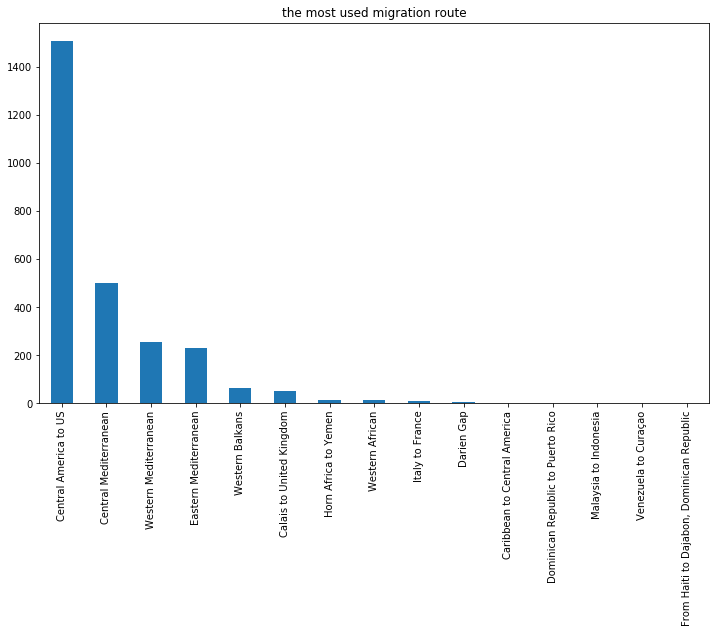

In [18]:
plt.rcParams["figure.figsize"] = (12,7)
data["Migration Route"].value_counts().plot(kind = "bar")
plt.title('the most used migration route')
plt.savefig('purchase_fre_job')

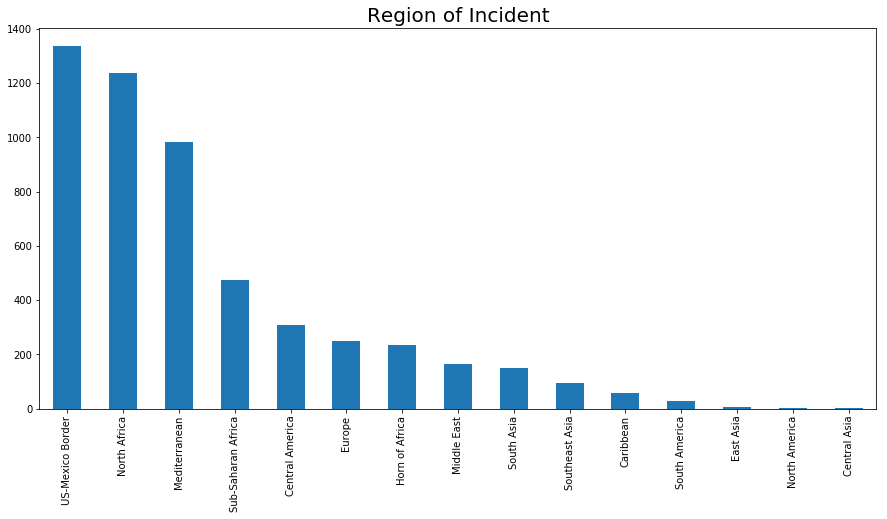

In [19]:
fig=plt.figure(figsize=(15,7))
data['Region of Incident'].value_counts().plot(kind='bar')
plt.title('Region of Incident',fontsize=20)
plt.show()

c:\users\asus\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\asus\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


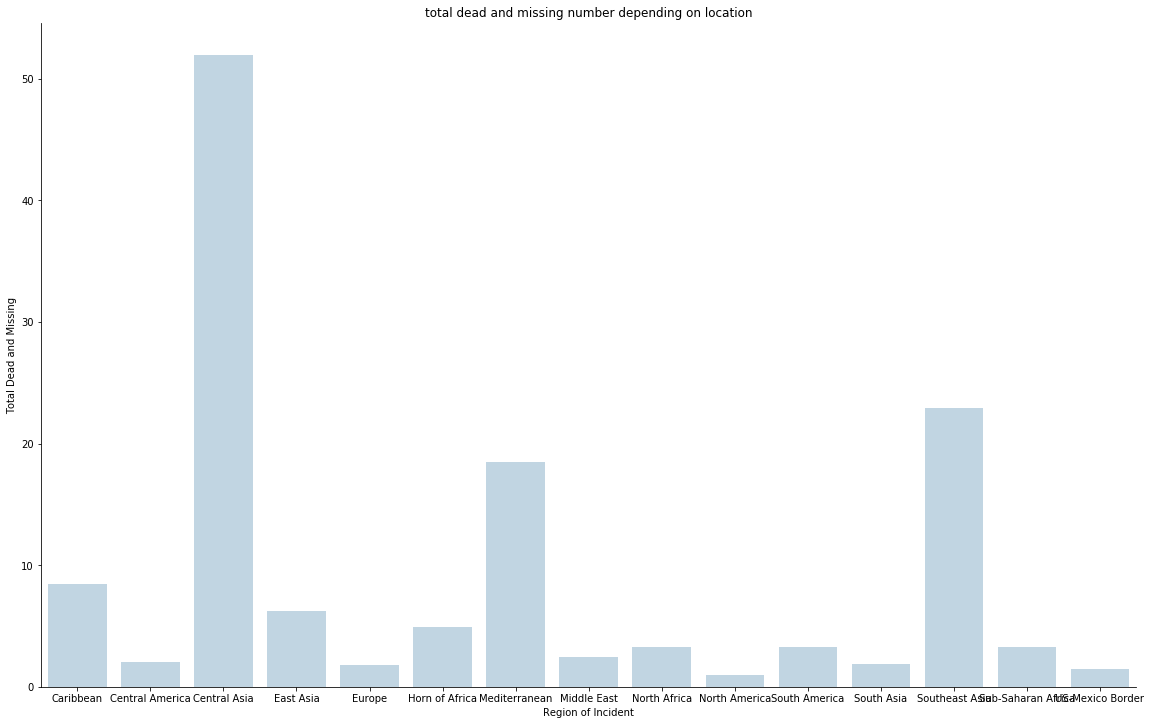

In [20]:
grid= sns.FacetGrid(data[['Region of Incident', 'Total Dead and Missing']]. groupby(['Region of Incident'], as_index=False).mean(),size=10,aspect=1.6)
grid.map(sns.barplot,'Region of Incident','Total Dead and Missing',alpha=.3)
grid.add_legend()
plt.title('total dead and missing number depending on location')
plt.savefig('purchase_fre_job')

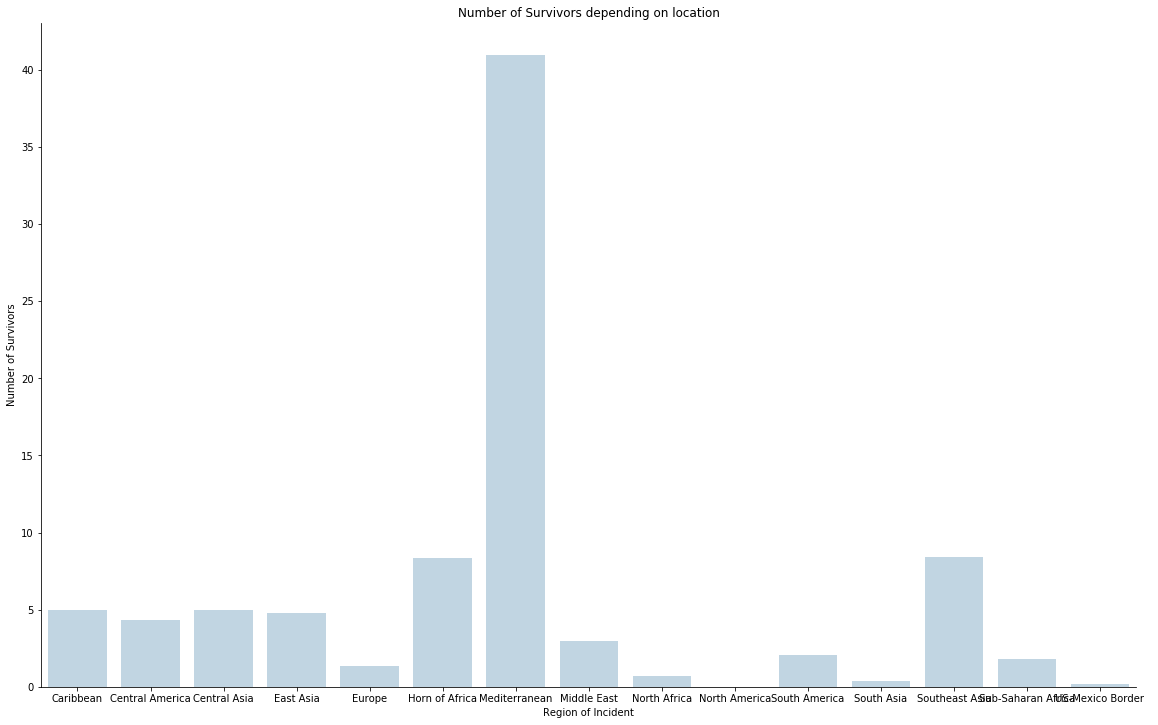

In [21]:
grid= sns.FacetGrid(data[['Region of Incident', 'Number of Survivors']]. groupby(['Region of Incident'], as_index=False).mean(),size=10,aspect=1.6)
grid.map(sns.barplot,'Region of Incident','Number of Survivors',alpha=.3)
grid.add_legend()
plt.title('Number of Survivors depending on location')
plt.savefig('purchase_fre_job')

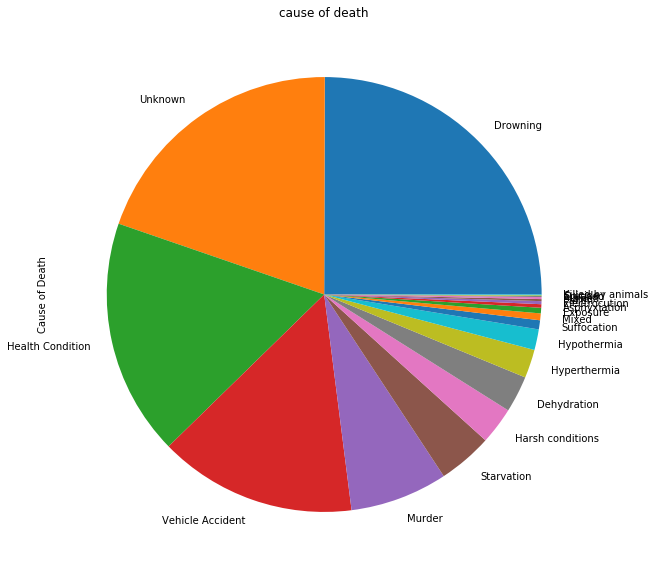

In [22]:
data['Cause of Death'].value_counts().plot(kind='pie',figsize=(20, 10), title= 'cause of death' )

we can see from this plot that most of the features are uncorellated but we can see that number of dead and missing is correlated to the number of children


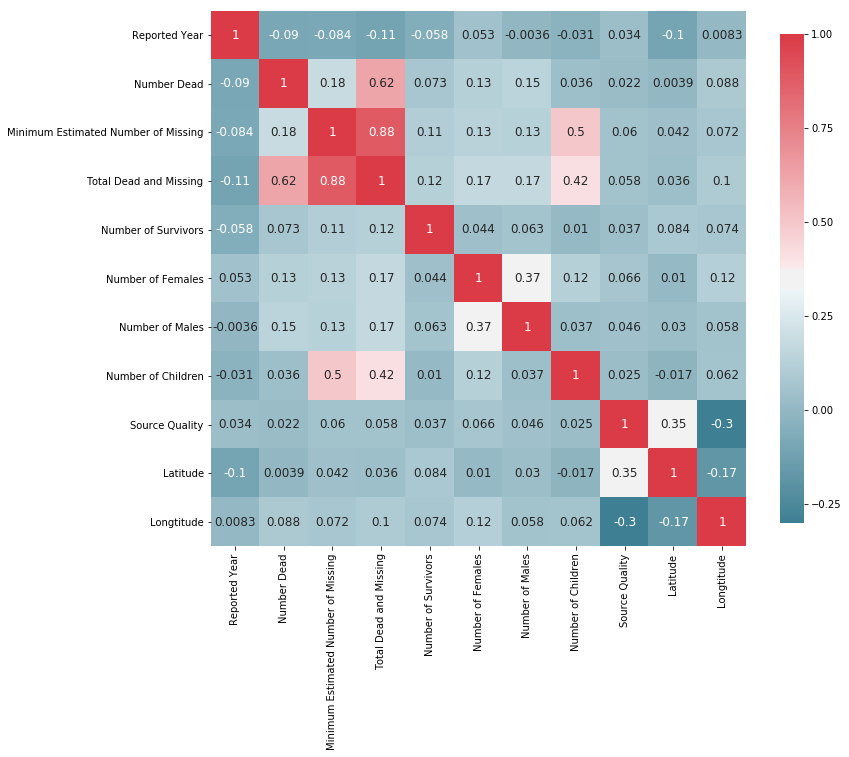

In [23]:
r = data.corr()
s , ax = plt.subplots( figsize =( 12 , 10 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
s = sns.heatmap(r, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

print('we can see from this plot that most of the features are uncorellated but we can see that number of dead and missing is correlated to the number of children')

# 3-Encoding Data

In [24]:
data1=data.drop(columns=['Location Description','Information Source','UNSD Geographical Grouping'],axis=1)

In [25]:
routeEnc={
    'Central America to US':0,
    'Central Mediterranean':1,
    'Eastern Mediterranean':2,
    'Western Balkans':3,
    'Calais to United Kingdom':4,
    'Western African':5,
    'Horn Africa to Yemen':6,
    'Italy to France':7,
    'Darien Gap':8,
    'Caribbean to Central America':9,
    'Dominican Republic to Puerto Rico':10,
    'Venezuela to Curaçao':11,
    'Malaysia to Indonesia':12,
    'From Haiti to Dajabon, Dominican Republic':13
}

In [26]:
data1['Migration Route']=data1['Migration Route'].map(routeEnc)

In [27]:
data1['Migration Route'].fillna(-1,inplace=True)

In [28]:
regionEnc={
    'US-Mexico Border':0,
    'North Africa':1,
    'Mediterranean':2,
    'Sub-Saharan Africa':3,
    'Central America':4,
    'Europe':5,
    'Horn of Africa':6,
    'Middle East':7,
    'South Asia':8,
    'Southeast Asia':9,
    'Caribbean':10,
    'South America':11,
    'East Asia':12,
    'Central Asia':13,
    'North America':14  
}
monthEnc={
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12
}

In [29]:
data1['Reported Month']=data1['Reported Month'].map(monthEnc)

In [30]:
dumbdata=pd.get_dummies(data["Cause of Death"])
data1=data1.join(dumbdata)
data1=data1.drop(["Cause of Death","Suicide"],axis=1)

In [31]:
ndata1=data1.copy(deep=True)
data1['Region of Incident']=data1['Region of Incident'].map(regionEnc)

In [32]:
data1.head()

,Region of Incident,Reported Year,Reported Month,Number Dead,Minimum Estimated Number of Missing,Total Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,...,Health Condition,Hyperthermia,Hypothermia,Killed by animals,Mixed,Murder,Starvation,Suffocation,Unknown,Vehicle Accident
0,2,2019,3,3,-1,2,36,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2019,3,4,0,4,11,3,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2,2019,3,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2019,3,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,2019,3,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
print('the percentage of migration where there are children: {:.2f}%'.format(data1[data1['Number of Children']>0]['Number Dead'].count()/data1['Number Dead'].count()*100))
print('the percentage of migration where there are Females: {:.2f}%'.format(data1[data1['Number of Females']>0]['Number Dead'].count()/data1['Number Dead'].count()*100))

the percentage of migration where there are children: 12.06%
the percentage of migration where there are Females: 16.78%


# 4-Data modeling

## predicting the number of dead and missing peaple

  #### Linear Regression model


In [34]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
data1['Number of Migrants']=data1['Total Dead and Missing']+data1['Number of Survivors']

In [36]:
y=data1['Total Dead and Missing']
x= data1.drop(['Total Dead and Missing','Number of Survivors',"Number Dead"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print ("R_²:", r2_score(y_test, predicted))

R_²: 0.8756601882587375


#### Polynomial Regression

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [47]:
y=data1['Total Dead and Missing']
x= data1.drop(['Total Dead and Missing','Number of Survivors',"Number Dead"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
pol=PolynomialFeatures(degree=2)
X_train=pol.fit_transform(x_train)
X_test=pol.fit_transform(x_test)
model=LinearRegression()
model.fit(X_train,y_train)
predicted=model.predict(X_test)
print ("R_²:", r2_score(y_test, predicted))

R_²: -1.440256510420868


## Predicting the Region of the incident
#### Classification tree

In [38]:
from sklearn.tree import tree

In [47]:
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

c:\users\asus\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [40]:
import graphviz

In [46]:
y=ndata1['Region of Incident']
x= ndata1.drop(["Region of Incident","Latitude","Longtitude"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, predicted))

Accuracy: 0.7572633552014996


In [ ]:
y=ndata1['Region of Incident']
x= ndata1.drop(["Region of Incident","Latitude","Longtitude"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model=tree.DecisionTreeClassifier()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
gph= export_graphviz(model,out_file=None,class_names=y.values,feature_names=list(x.columns),filled=True,special_characters=True)
graphe=graphviz.Source(gph)
graphe.render('Region',view=True)
graphe

In [48]:
from sklearn.metrics import classification_report

In [50]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=predicted)
print(sk_report)

                    precision    recall  f1-score   support

         Caribbean   0.300000  0.272727  0.285714        11
   Central America   0.583333  0.614035  0.598291        57
         East Asia   0.000000  0.000000  0.000000         3
            Europe   0.763636  0.750000  0.756757        56
    Horn of Africa   0.365385  0.487179  0.417582        39
     Mediterranean   0.883495  0.928571  0.905473       196
       Middle East   0.771429  0.818182  0.794118        33
      North Africa   0.730769  0.760000  0.745098       250
     South America   0.666667  0.333333  0.444444         6
        South Asia   0.636364  0.482759  0.549020        29
    Southeast Asia   0.357143  0.250000  0.294118        20
Sub-Saharan Africa   0.539326  0.457143  0.494845       105
  US-Mexico Border   0.926923  0.919847  0.923372       262

          accuracy                       0.757263      1067
         macro avg   0.578805  0.544137  0.554525      1067
      weighted avg   0.753476  0.75726

#### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

y=nds['Region of Incident']
x= nds.drop(["Region of Incident","Lon","Lat"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model=RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)
predicted=model.predict(x_test)

In [53]:
y=ndata1['Region of Incident']
x= ndata1.drop(["Region of Incident","Latitude","Longtitude"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model=RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train)
predicted=model.predict(x_test)

In [54]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=predicted)
print(sk_report)

                    precision    recall  f1-score   support

         Caribbean   0.000000  0.000000  0.000000        11
   Central America   0.693878  0.596491  0.641509        57
         East Asia   0.000000  0.000000  0.000000         3
            Europe   0.701754  0.714286  0.707965        56
    Horn of Africa   0.392857  0.282051  0.328358        39
     Mediterranean   0.802575  0.954082  0.871795       196
       Middle East   0.771429  0.818182  0.794118        33
      North Africa   0.720000  0.792000  0.754286       250
     North America   0.000000  0.000000  0.000000         0
     South America   0.000000  0.000000  0.000000         6
        South Asia   0.761905  0.551724  0.640000        29
    Southeast Asia   0.428571  0.150000  0.222222        20
Sub-Saharan Africa   0.531915  0.476190  0.502513       105
  US-Mexico Border   0.950192  0.946565  0.948375       262

          accuracy                       0.762887      1067
         macro avg   0.482505  0.44868

c:\users\asus\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\asus\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# conclusion

### visulisation:
    provide more security for the most used migration route and the biggest region of migration at the last 5 months of the     year


### modeling:
    knowing how many workers each region must provide to secure the route before anything bad happend